In [6]:
import json
from web3 import Web3

In [7]:
f = open("abi.json")
abi = json.load(f)
f.close()

f = open("bytecode.json")
bytecode_json = json.load(f)
f.close()
bytecode = bytecode_json["object"]


### You will need to make sure Ganache is running and is setup for http://127.0.0.1:8545.
### Also make sure your first account has several ether to run this script

In [8]:
ganache_server = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_server))
web3.isConnected()

True

In [9]:
web3.eth.default_account = web3.eth.accounts[0]

In [10]:
numbers_list=[]

In [11]:
lotto_contract = web3.eth.contract(abi=abi, bytecode=bytecode)
for i in range(0,10):
    tx_hash = lotto_contract.constructor(web3.eth.default_account, 60).transact()
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    current_contract = web3.eth.contract(address=tx_receipt.contractAddress, abi=abi)
    tx_hash = current_contract.functions.finalize().transact()
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    winning_numbers = current_contract.functions.getWinningNumbers().call()
    numbers_list.append(winning_numbers)

In [12]:
all_numbers = [number for sublist in numbers_list for number in sublist]

In [13]:
numbers_list

[[6, 14, 25, 35, 45, 57],
 [9, 19, 34, 36, 57, 59],
 [16, 24, 30, 47, 48, 51],
 [3, 20, 38, 39, 41, 42],
 [24, 27, 30, 54, 56, 58],
 [7, 13, 27, 52, 53, 60],
 [7, 17, 27, 36, 42, 56],
 [9, 20, 30, 36, 51, 53],
 [11, 26, 30, 40, 44, 60],
 [3, 7, 9, 30, 39, 45]]

In [20]:
prediction1 = [7,11,21,35,42,60]
prediction2 = [10,19,21,28,43,56]
prediction3 = [2,9,20,34,41,44]
prediction4 = [1,17,33,35,46,52]

if prediction1 in numbers_list:
    print("prediction 1 found")
if prediction2 in numbers_list:
    print("prediction 2 found")
if prediction3 in numbers_list:
    print("prediction 3 found")
if prediction4 in numbers_list:
    print("prediction 4 found")
print("if nothing else printed, there are no matches")

if nothing else printed, there are no matches


In [9]:
from collections import Counter

In [ ]:
## run solution 1000 times and do a count of the numbers
## df = pd.Dataframe         how do i save the list and run a count
## dictionary can be plotted/ list of keys and list of frequencies   convert to x/y list so i can plot it
## pivot table and sum/  turn list into pandas dataframe  then do a .count on the pivot
## counter on each individual number
## frequency of each number in each slot; calling the list   : numbers_list
## rand_choice library: make a list of 1000 hypothetical random pick 6, and compare it to actual winning tickets

In [5]:
myCounter  = Counter(all_numbers)

NameError: name 'Counter' is not defined

In [11]:
myCounter

Counter({2: 99,
         6: 97,
         18: 118,
         38: 112,
         49: 94,
         54: 96,
         14: 100,
         41: 88,
         44: 94,
         55: 100,
         57: 112,
         15: 98,
         20: 89,
         27: 101,
         28: 97,
         33: 94,
         60: 103,
         23: 91,
         56: 96,
         4: 111,
         8: 102,
         10: 123,
         47: 104,
         59: 85,
         17: 107,
         19: 83,
         34: 100,
         39: 115,
         48: 103,
         13: 93,
         21: 121,
         29: 107,
         51: 90,
         9: 92,
         25: 102,
         22: 116,
         35: 105,
         37: 101,
         32: 97,
         45: 90,
         24: 113,
         31: 96,
         36: 99,
         50: 98,
         1: 100,
         5: 101,
         7: 86,
         52: 95,
         40: 98,
         46: 99,
         30: 87,
         3: 100,
         12: 88,
         58: 105,
         11: 112,
         43: 98,
         53: 104,
         42:

In [12]:
x = list(range(0,61))

In [13]:
y = [0]*61
for i in all_numbers:
    y[i] += 1

In [14]:
import matplotlib
import pandas as pd

In [15]:
countdf = pd.DataFrame({"x": x, "y":y})
sorteddf = countdf.sort_values("y")

<AxesSubplot:>

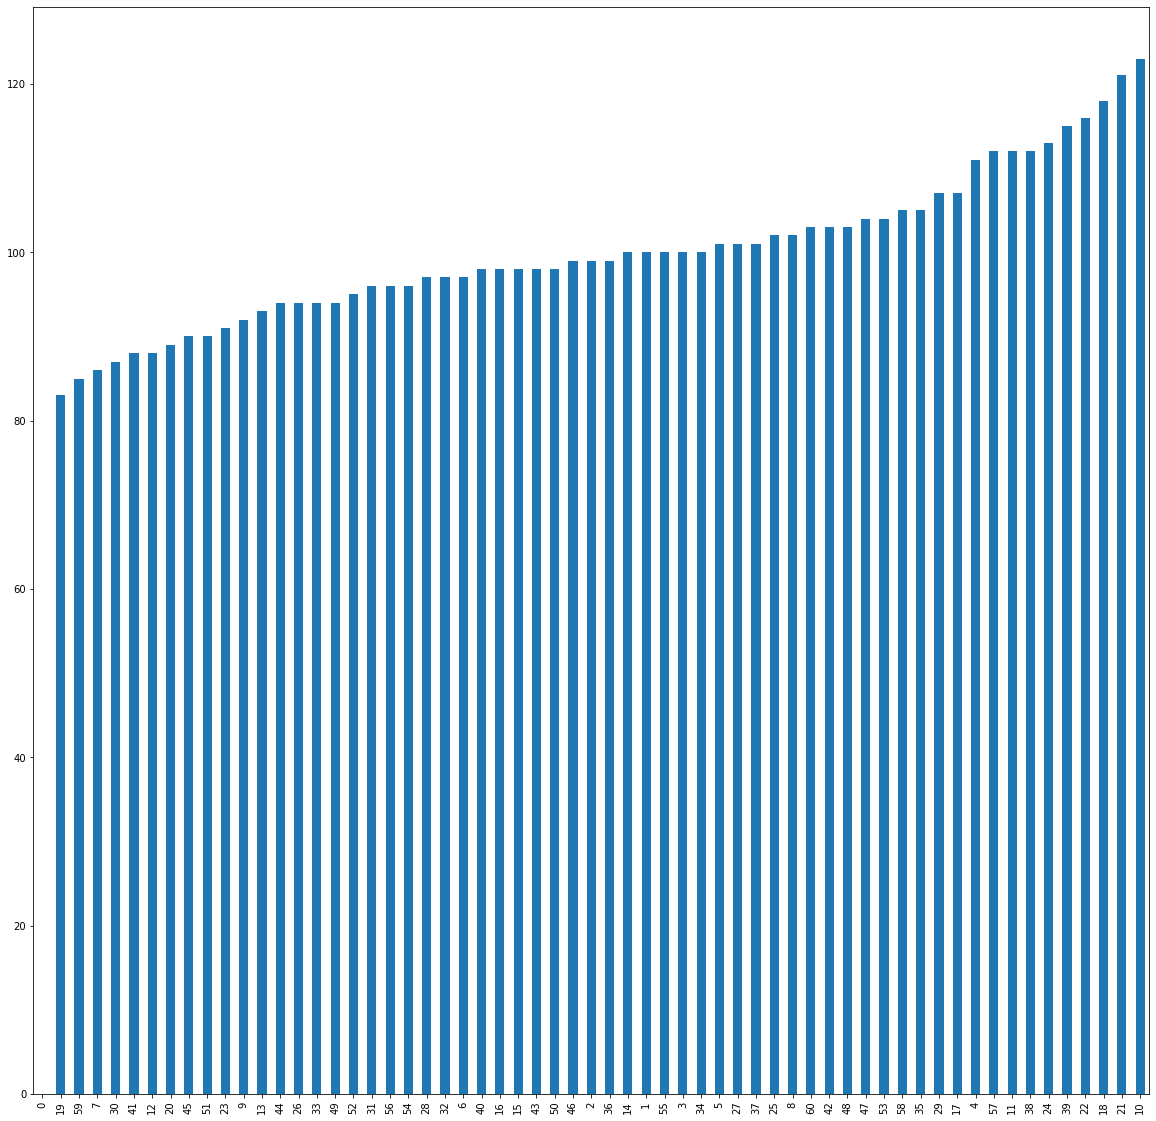

In [16]:
sorteddf['y'].plot(kind="bar",figsize=(20, 20))

In [17]:
sorteddf.tail(6) # most frequent

,x,y
24,24,113
39,39,115
22,22,116
18,18,118
21,21,121
10,10,123


In [4]:
sorteddf.head(7) # least frequent

NameError: name 'sorteddf' is not defined

In [3]:
sorteddf["x"].hist(bins=20)

NameError: name 'sorteddf' is not defined